# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Set up dependencies and API key

from api_keys import weather_api_key
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from citipy import citipy
import json

#Range of latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Set the empty lists for cities, latitude, longitude 

cities = []
lat_lng = []

#Create the list by creating a set of random lat and lng combos
lat = np.random.uniform(low=-90.00, high=90.00, size=1500)
lng = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lng = zip(lat, lng)

#Find nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Add new city names, and skip if already in the list 
    if city not in cities:
        cities.append(city)

#Print the city count
len(cities)

620

In [3]:
#Make your API call

url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=23145c4e4a37ab5ef7e695eeec4fc44c'

In [4]:
#Collect the data on each city in the dataset and create empty lists 
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0 

#Create a for loop to go through data and fill the lists

for city in cities:
    response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = response.json()
    try:
        city_name.append(weather_json["city"]["name"])
        lat.append(weather_json["city"]["coord"]["lat"])
        lng.append(weather_json["city"]["coord"]["lon"])
        max_temp.append(weather_json["list"][0]["main"]["temp_max"])
        humidity.append(weather_json["list"][0]["main"]["humidity"])
        cloudiness.append(weather_json["list"][0]["clouds"]["all"])
        wind_speed.append(weather_json["list"][0]["wind"]["speed"])
        country.append(weather_json["city"]["country"])
        date.append(weather_json["list"][0]["dt"])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("No Record Found") 
        pass
        
print("---------------")
print("Data Retrieval Complete")
print("---------------")


Processing record 1 of Set 1 | tasiilaq
Processing record 2 of Set 1 | yokadouma
Processing record 3 of Set 1 | albany
Processing record 4 of Set 1 | bluff
Processing record 5 of Set 1 | kysyl-syr
Processing record 6 of Set 1 | homer
Processing record 7 of Set 1 | fuerte olimpo
Processing record 8 of Set 1 | muyezerskiy
Processing record 9 of Set 1 | puerto ayora
Processing record 10 of Set 1 | ushuaia
Processing record 11 of Set 1 | hoshcha
Processing record 12 of Set 1 | north bend
Processing record 13 of Set 1 | rikitea
Processing record 14 of Set 1 | butaritari
Processing record 15 of Set 1 | norden
Processing record 16 of Set 1 | lebu
Processing record 17 of Set 1 | busselton
Processing record 18 of Set 1 | norman wells
Processing record 19 of Set 1 | mataura
Processing record 20 of Set 1 | hami
Processing record 21 of Set 1 | cape town
Processing record 22 of Set 1 | atuona
Processing record 23 of Set 1 | christiana
Processing record 24 of Set 1 | kapaa
Processing record 25 of Se

No Record Found
Processing record 191 of Set 1 | fort nelson
Processing record 192 of Set 1 | maputo
No Record Found
Processing record 193 of Set 1 | guerrero negro
Processing record 194 of Set 1 | tilichiki
Processing record 195 of Set 1 | goderich
Processing record 196 of Set 1 | puerto quijarro
Processing record 197 of Set 1 | coihaique
Processing record 198 of Set 1 | arinos
Processing record 199 of Set 1 | portland
Processing record 200 of Set 1 | palmer
Processing record 201 of Set 1 | longyearbyen
Processing record 202 of Set 1 | adrar
Processing record 203 of Set 1 | torbay
Processing record 204 of Set 1 | poum
Processing record 205 of Set 1 | maceio
Processing record 206 of Set 1 | aripuana
Processing record 207 of Set 1 | coihueco
Processing record 208 of Set 1 | beauchamps
Processing record 209 of Set 1 | honiara
No Record Found
Processing record 210 of Set 1 | korla
No Record Found
Processing record 211 of Set 1 | bitung
Processing record 212 of Set 1 | saint anthony
Proces

Processing record 377 of Set 1 | lagoa formosa
Processing record 378 of Set 1 | buala
No Record Found
Processing record 379 of Set 1 | bahia blanca
Processing record 380 of Set 1 | kudahuvadhoo
Processing record 381 of Set 1 | ponta do sol
Processing record 382 of Set 1 | olafsvik
Processing record 383 of Set 1 | namtsy
Processing record 384 of Set 1 | karpathos
Processing record 385 of Set 1 | port hawkesbury
Processing record 386 of Set 1 | katima mulilo
Processing record 387 of Set 1 | katangli
No Record Found
Processing record 388 of Set 1 | tabou
Processing record 389 of Set 1 | meridian
Processing record 390 of Set 1 | agadir
No Record Found
Processing record 391 of Set 1 | miranda
Processing record 392 of Set 1 | flin flon
No Record Found
Processing record 393 of Set 1 | qaqortoq
Processing record 394 of Set 1 | ewa beach
Processing record 395 of Set 1 | nelson bay
Processing record 396 of Set 1 | luderitz
Processing record 397 of Set 1 | santa isabel do rio negro
Processing rec

Processing record 567 of Set 1 | kropachevo
---------------
Data Retrieval Complete
---------------


In [5]:
weather_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp,
                           "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, 
                           "Country": country, "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,34.02,95,100,31.09,GL,1600225200
1,Yokadouma,3.5167,15.0500,69.49,96,74,2.57,CM,1600225200
2,Albany,42.6001,-73.9662,49.59,70,25,2.59,US,1600225200
3,Bluff,-46.6000,168.3333,50.74,79,100,33.04,NZ,1600225200
4,Kysyl-Syr,63.8986,122.7617,54.30,76,7,4.23,RU,1600225200


In [6]:
#Find the amount of cities again
city_count2 = len(weather_df)
print(f"There are now {city_count2} cities in the dataframe.")

There are now 567 cities in the dataframe.


In [7]:
#Send data to output data folder
weather_df.to_csv(r'output_data\my_weather_df.csv')

In [8]:
#Find all the statistical values for the dataframe 
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.339112,13.449599,65.868342,72.146384,53.389771,7.927425,1.600225e+09
std,33.077556,91.137918,14.554532,18.114713,36.113995,5.650003,0.000000e+00
min,-54.800000,-179.166700,19.260000,13.000000,0.000000,0.250000,1.600225e+09
25%,-3.774050,-68.552950,53.905000,65.000000,18.500000,3.635000,1.600225e+09
50%,26.184200,17.691000,67.230000,77.000000,56.000000,6.670000,1.600225e+09
75%,47.508300,95.027350,77.890000,85.000000,87.000000,11.050000,1.600225e+09
max,78.218600,179.316700,99.120000,99.000000,100.000000,33.040000,1.600225e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

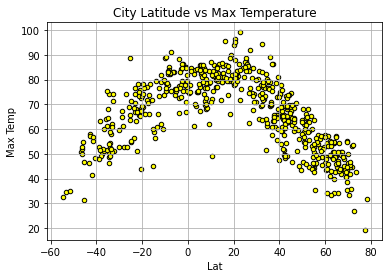

In [26]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Max Temperature 
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", title = "City Latitude vs Max Temperature",
                                color = "yellow", edgecolor = "black", grid = True)
                                
#Save the chart to the output folder
plt.savefig("Lat vs. Temp Plot.png")
plt.show()

## Latitude vs. Humidity Plot

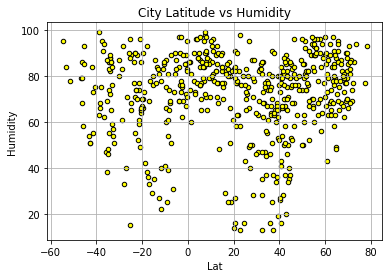

In [27]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Humidity
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Humidity", title = "City Latitude vs Humidity",
                                color = "yellow", edgecolor = "black", grid = True)
                                

#Save the chart to the output folder
plt.savefig("Lat vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

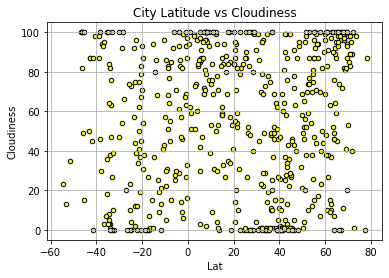

In [28]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Cloudiness 
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", title = "City Latitude vs Cloudiness",
                                color = "yellow", edgecolor = "black", grid = True)
                                

#Save the chart to the output folder
plt.savefig("Lat vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

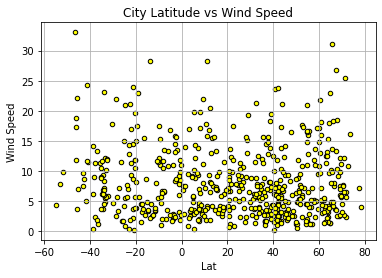

In [29]:
#Create the scatter plot to show the coorelation between the City's Latitude vs the Wind Speed
weather_chart = weather_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", title = "City Latitude vs Wind Speed",
                                color = "yellow", edgecolor = "black", grid = True)
                                
#Save the chart to the output folder
plt.savefig("Lat vs. Wind. Speed.png")
plt.show()

## Linear Regression

In [14]:
#Now time to find the linear regression for the data looking at the Northern and Southern Hemisphere
#Set up Northern and Southern Hemisphere variables 

north_hem = weather_df.loc[weather_df["Lat"] >= 0,:] 
south_hem = weather_df.loc[weather_df["Lat"] < 0,:] 
north_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,34.02,95,100,31.09,GL,1600225200
1,Yokadouma,3.5167,15.0500,69.49,96,74,2.57,CM,1600225200
2,Albany,42.6001,-73.9662,49.59,70,25,2.59,US,1600225200
4,Kysyl-Syr,63.8986,122.7617,54.30,76,7,4.23,RU,1600225200
5,Homer,59.6425,-151.5483,52.90,77,90,9.48,US,1600225200


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6825500957785372


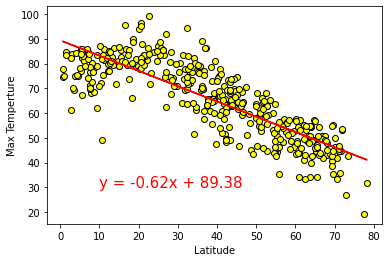

In [31]:
#Create a linear regression chart comparing Max Temp and Latitude for the Northern Hemisphere
x_values = north_hem["Lat"]
y_values = north_hem["Max Temhttps://www.google.com/search?client=safari&channel=iphone_bm&sxsrf=ALeKk03F6DOIAw34Z-I8ehWN2DBso0cJNQ%3A1600212245739&source=hp&ei=FU1hX77uKu2xggfu0YOACQ&q=how+to+group+military+time+in+python&oq=how+to+group+military+time+in+python&gs_lcp=CgZwc3ktYWIQAzoECCMQJzoFCAAQkQI6BQgAELEDOggIABCxAxCDAToECAAQQzoCCAA6BggAEBYQHjoICAAQCBANEB46CAghEBYQHRAeUJcEWKKEAWC0hgFoBXAAeACAAYABiAHcGZIBBDM0LjWYAQCgAQGqAQdnd3Mtd2l6&sclient=psy-ab&ved=0ahUKEwj-zOGTp-zrAhXtmOAKHe7oAJAQ4dUDCAw&uact=5p"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "yellow", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")
print(f"The r-squared is: {rvalue**2}")
#Save the chart to the output folder
plt.savefig("Max vs. Lat Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6321808182277926


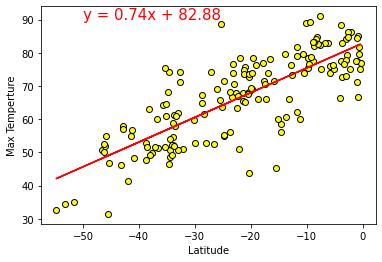

In [32]:
#Create a linear regression chart comparing Max Temp and Latitude for the Southern Hemisphere
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "yellow", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")
print(f"The r-squared is: {rvalue**2}")
#Save the chart to the output folder
plt.savefig("Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0007837380744666628


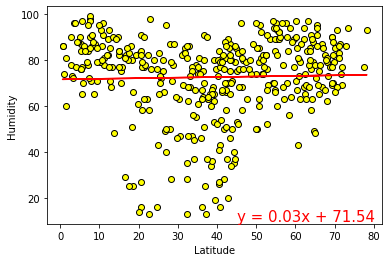

In [34]:
#Create a linear regression chart comparing Humidity(%) and Latitude for the Northern Hemisphere
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "yellow", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
#Save the chart to the output folder
plt.savefig("Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002156865816000104


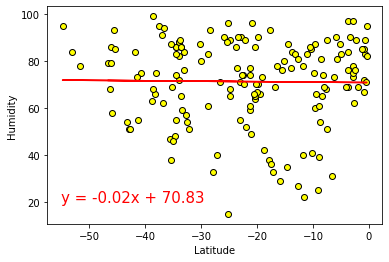

In [35]:
#Create a linear regression chart comparing Humidity(%) and Latitude for the Southern Hemisphere
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "yellow", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
#Save the chart to the output folder
plt.savefig("Southern Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.014686271875462826


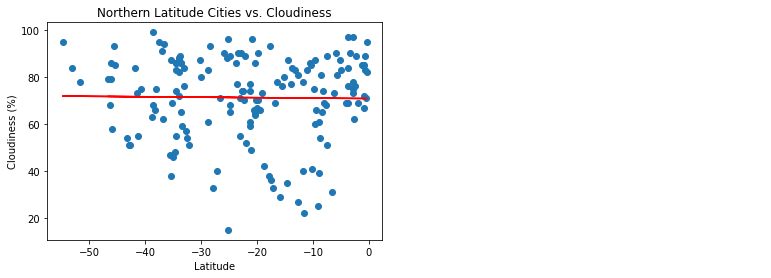

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,55),fontsize=15,color="yellow")
plt.title("Northern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

#Save the chart to the output folder
plt.savefig("Northern Cloudiness vs. Lattitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.014686271875462826


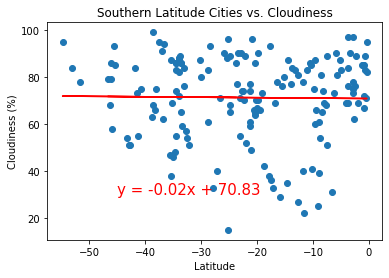

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")


#Save the chart to the output folder
plt.savefig("Cloudiness vs. Latitude Plot.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.014686271875462826


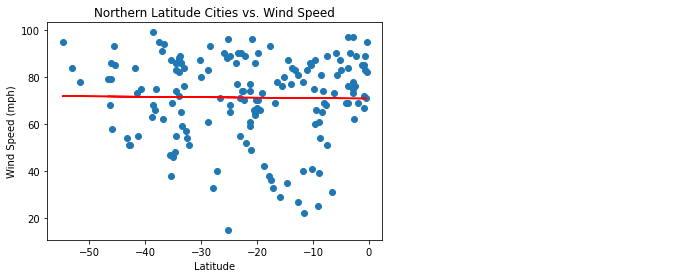

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

#Save the chart to the output folder
plt.savefig("Wind speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.014686271875462826


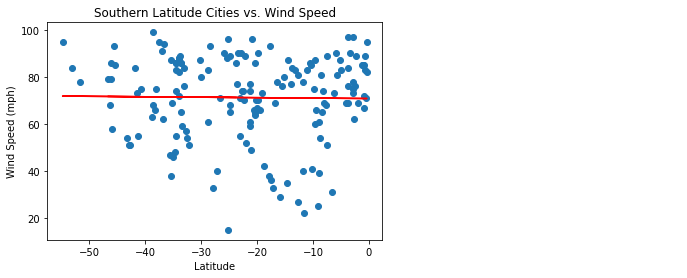

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

#Save the chart to the output folder
plt.savefig("Wind Spead Southern vs. Latitude Linear Regression.png")
plt.show()